### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 2nd at 11.59pm CT
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?


6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

## Solution

### Part 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [3]:
#Reading in data
data = np.load('/Users/petrop3/Repos/astr_8070_s22/coursework/homeworks/hw_data/hw7_data_1.npy')
X = data[:,0:2] #two data features
y = data[:,2] #target labels
yerr = data[:,3] #heteroscedastic uncertainties on the labels

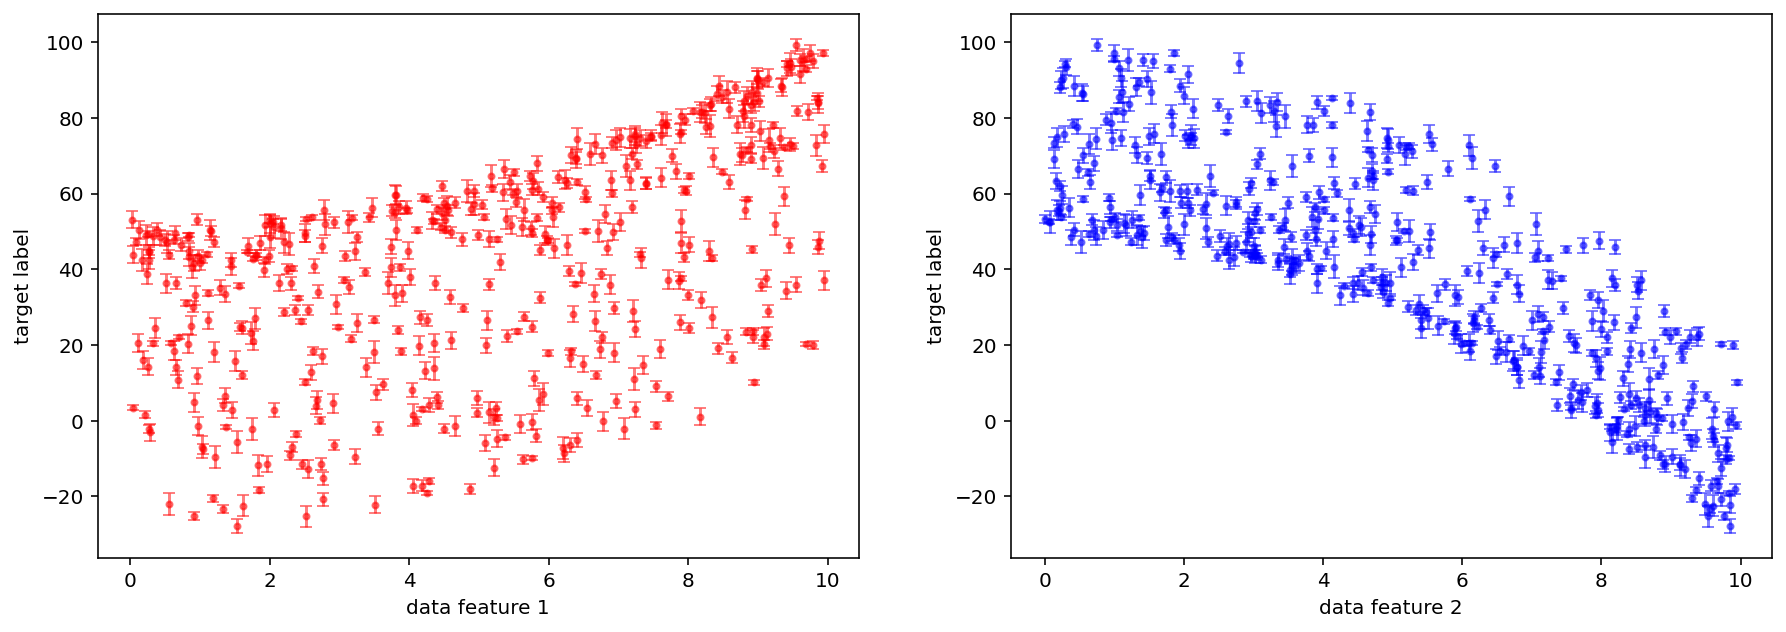

In [20]:
#Plotting data in 2 panels
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].errorbar(X[:,0], y, yerr, marker='o', ms=3, capsize=3, color='r', alpha=0.5, ls='none')
ax[0].set_xlabel('data feature 1')
ax[0].set_ylabel('target label')

ax[1].errorbar(X[:,1], y, yerr, marker='o', ms=3, capsize=3, color='b', alpha=0.5, ls='none')
ax[1].set_xlabel('data feature 2')
ax[1].set_ylabel('target label')

plt.show()

### Part 2

In [21]:
from astroML.linear_model import LinearRegression

In [22]:
#Multivariate linear regression to get coefficient values
model = LinearRegression()
model.fit(X, y, yerr)
print('Best-fit values:', model.coef_)

Best-fit values: [57.10102323  4.94873016 -8.30023407]


In [25]:
#Prediction Xgrids for each feature
Xgrid_f1 = np.linspace(min(X[:,0]), max(X[:,0]))
Xgrid_f2 = np.linspace(min(X[:,1]), max(X[:,1]))

#Best fits applied to Xgrids
ygrid_f1 = model.coef_[0] + model.coef_[1]*Xgrid_f1
ygrid_f2 = model.coef_[0] + model.coef_[2]*Xgrid_f2

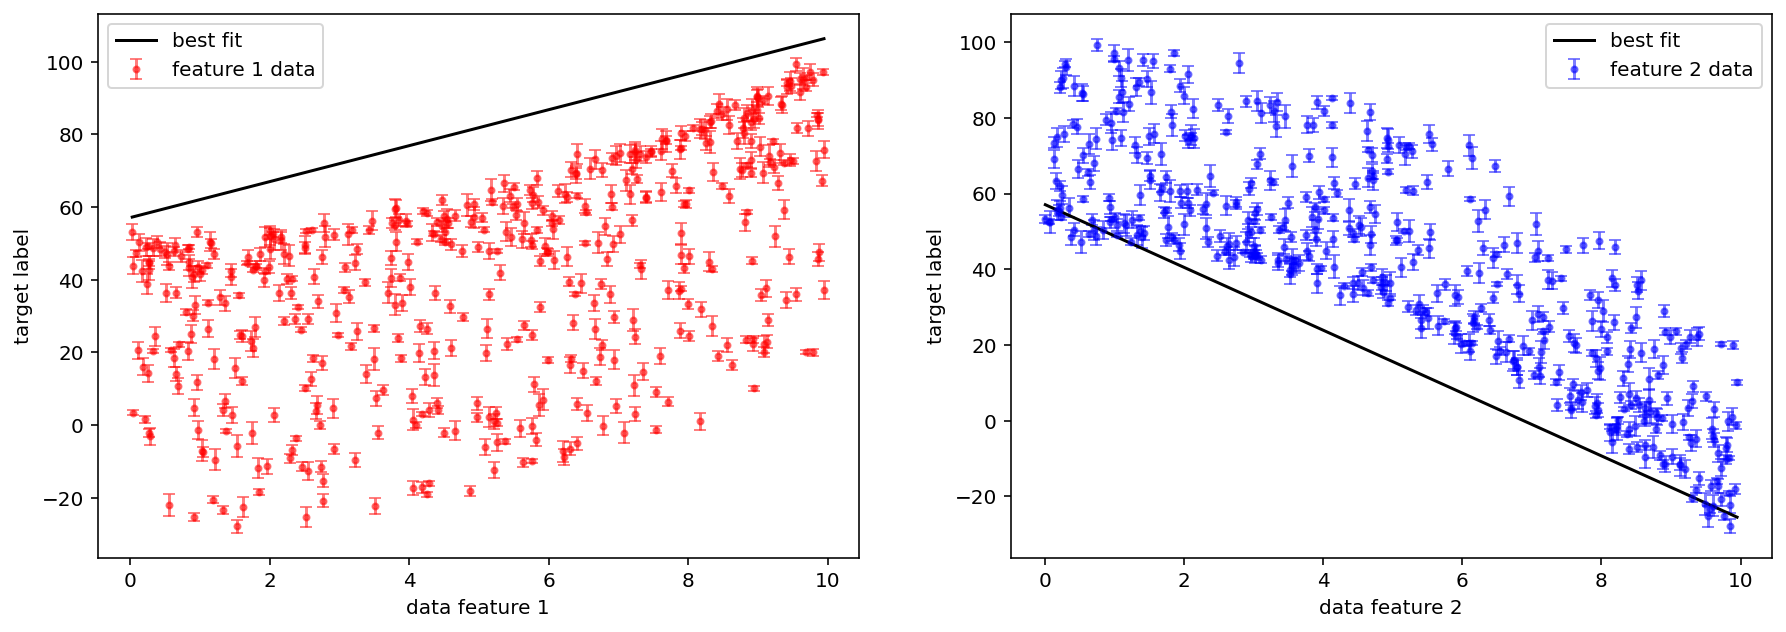

In [28]:
#Plotting best fits on top of scatter plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].errorbar(X[:,0], y, yerr, marker='o', ms=3, capsize=3, color='r', alpha=0.5, ls='none', label='feature 1 data')
ax[0].plot(Xgrid_f1, ygrid_f1, color='k', label='best fit')
ax[0].set_xlabel('data feature 1')
ax[0].set_ylabel('target label')
ax[0].legend()

ax[1].errorbar(X[:,1], y, yerr, marker='o', ms=3, capsize=3, color='b', alpha=0.5, ls='none', label='feature 2 data')
ax[1].plot(Xgrid_f2, ygrid_f2, color='k', label='best fit')
ax[1].set_xlabel('data feature 2')
ax[1].set_ylabel('target label')
ax[1].legend()

plt.show()

The best fit lines really don't describe the data very well.

### Part 3

In [29]:
Xgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid_f1, Xgrid_f2))).T #2D meshgrid
y_pred = model.predict(Xgrid) #predicting labels with best fit model

/var/folders/tq/_zbt6tvn54j23tbg267ynw3c0000gr/T/ipykernel_28486/2566392147.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid_f1, Xgrid_f2))).T #2D meshgrid


<IPython.core.display.Javascript object>


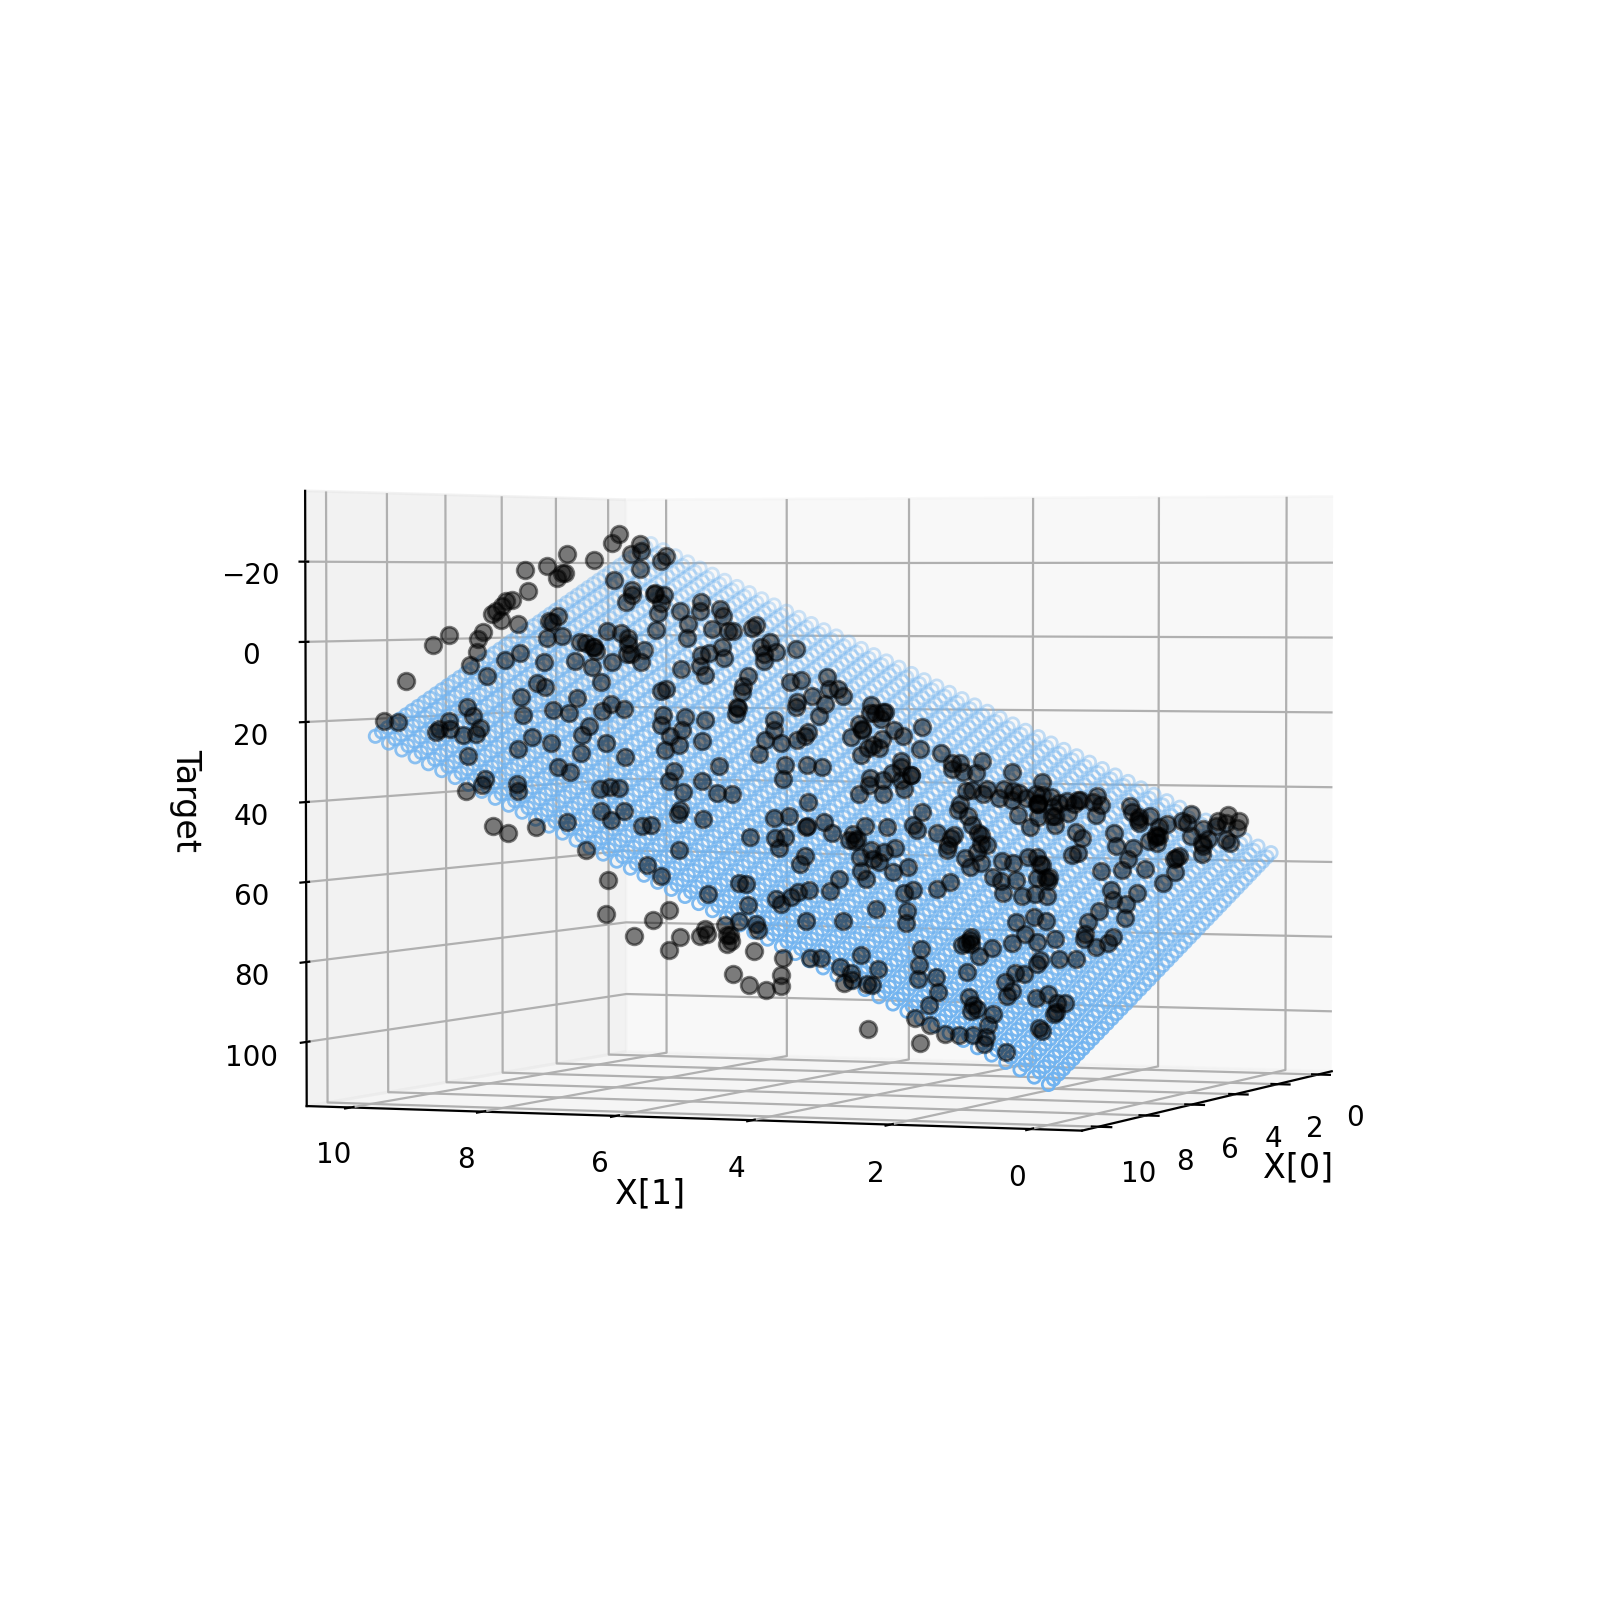

In [33]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [34]:
# To turn off interactive plotting
%matplotlib inline

### Part 4

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [36]:
#Doing GridSearchCV to find best Ridge regression hyper-parameters
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
grid = GridSearchCV(Ridge(), ridge_params)
grid.fit(X, y, sample_weight=1/yerr**2)
print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

Best params: {'alpha': 1.0, 'solver': 'lsqr'}
Best score: 0.929182742615996


In [37]:
#Fitting data with best options
modelR = Ridge(alpha=1.0, solver='lsqr')
modelR.fit(X, y, sample_weight=1/yerr**2)
y_predR = modelR.predict(Xgrid)

<IPython.core.display.Javascript object>


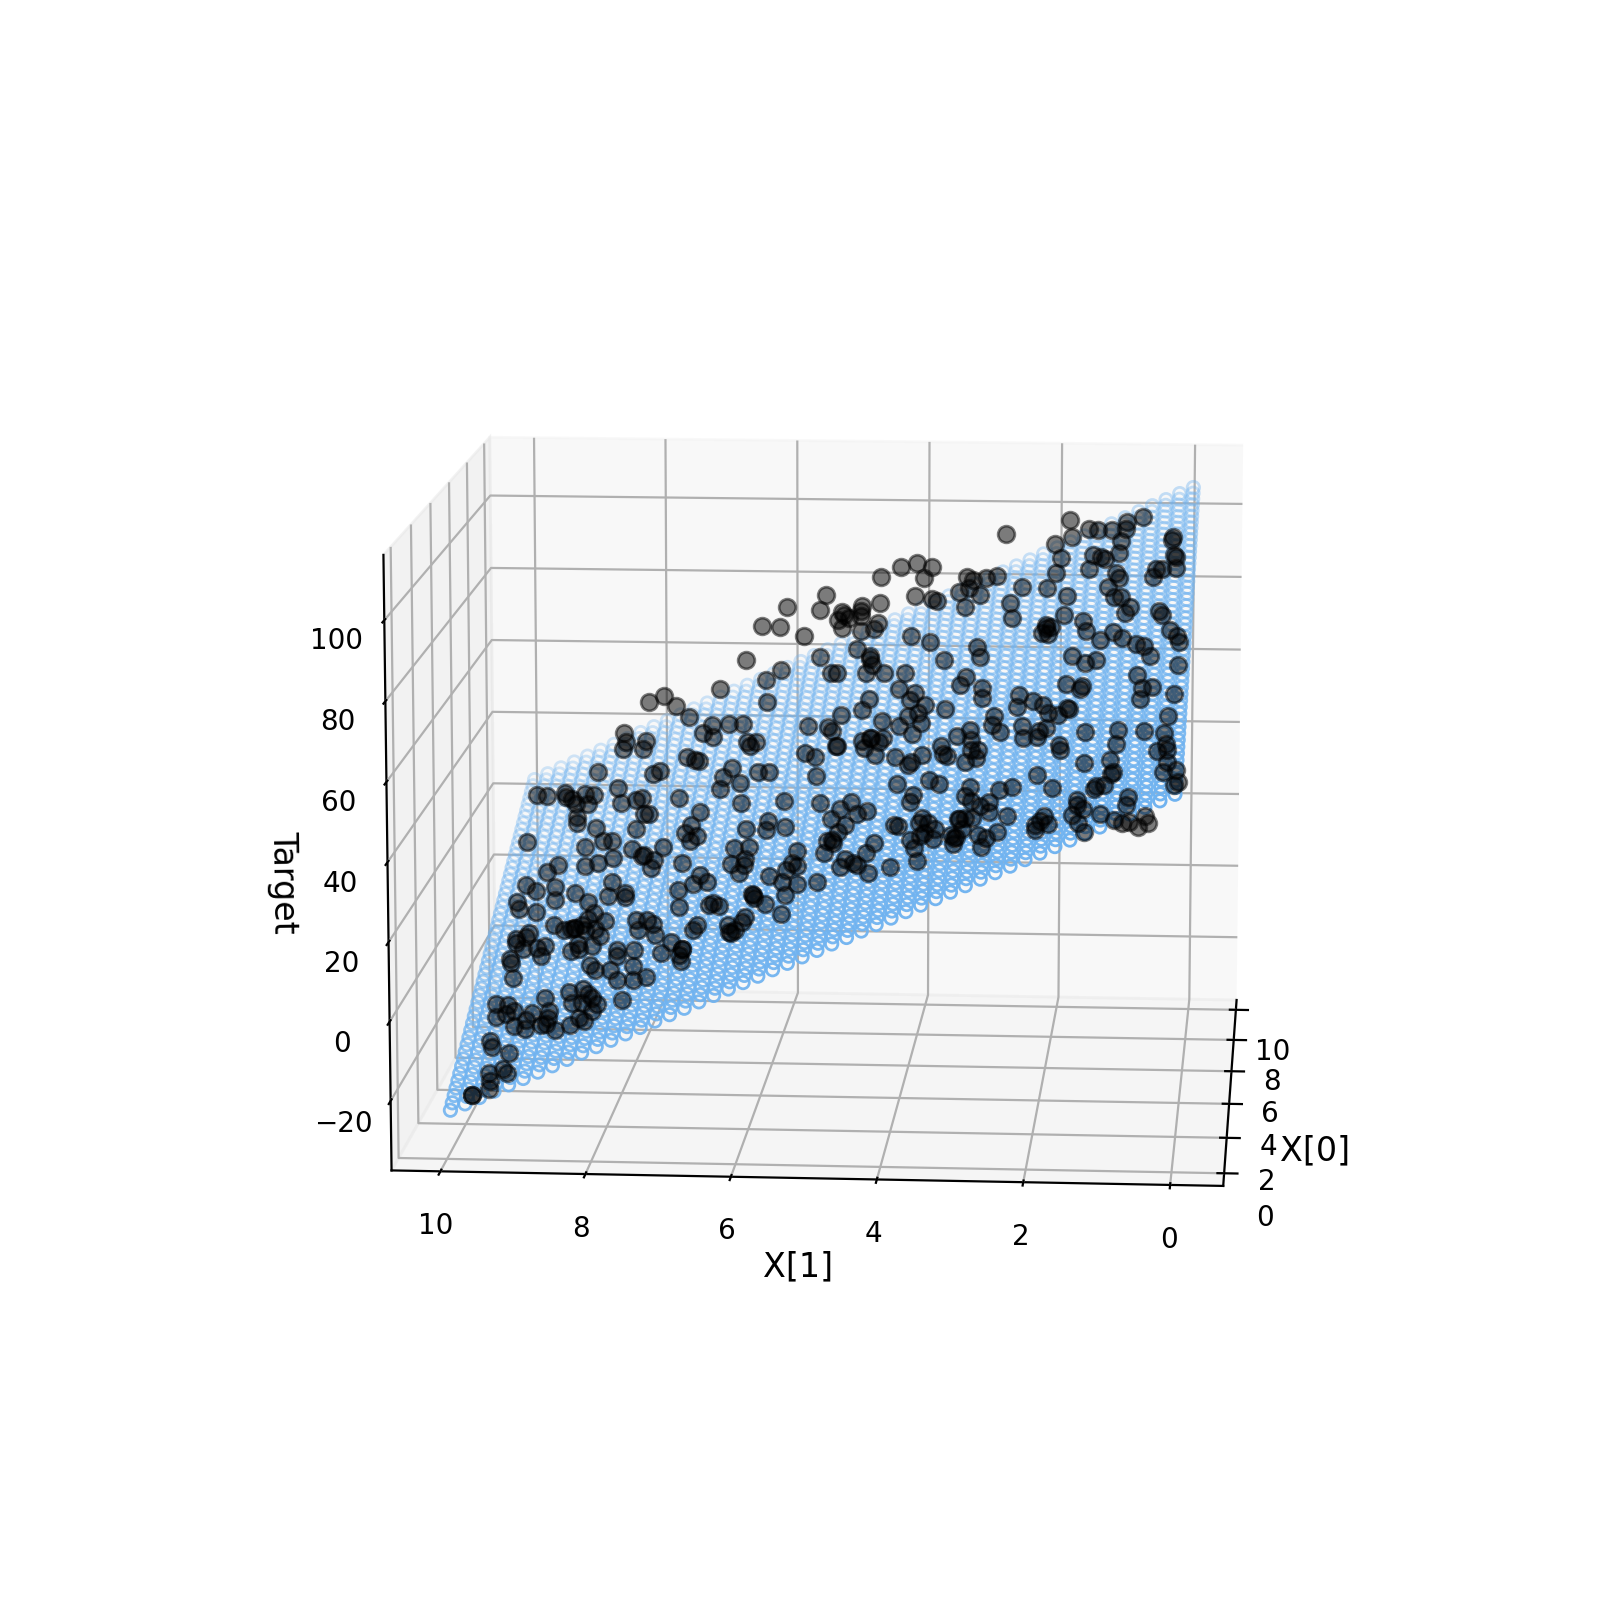

In [46]:
#Plotting best Ridge fit
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_predR, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [47]:
%matplotlib inline

In [40]:
from sklearn.linear_model import RidgeCV

In [41]:
#Now comparing with RidgeCV
gridRCV = RidgeCV(alphas=(0.05,0.1,0.2,0.5,1.0))
gridRCV.fit(X, y, sample_weight=1/yerr**2)
print('Cross-validated alpha:', gridRCV.alpha_)

Cross-validated alpha: 1.0


This agrees with the alpha given by GridSearchCV.

### Part 5

In [42]:
from astroML.linear_model import NadarayaWatson

In [43]:
#Nadaraya-Watson regression on the data
NWclf = NadarayaWatson('gaussian', h=0.2)
NWclf.fit(X, y, yerr)
y_predNW = NWclf.predict(Xgrid)

<IPython.core.display.Javascript object>


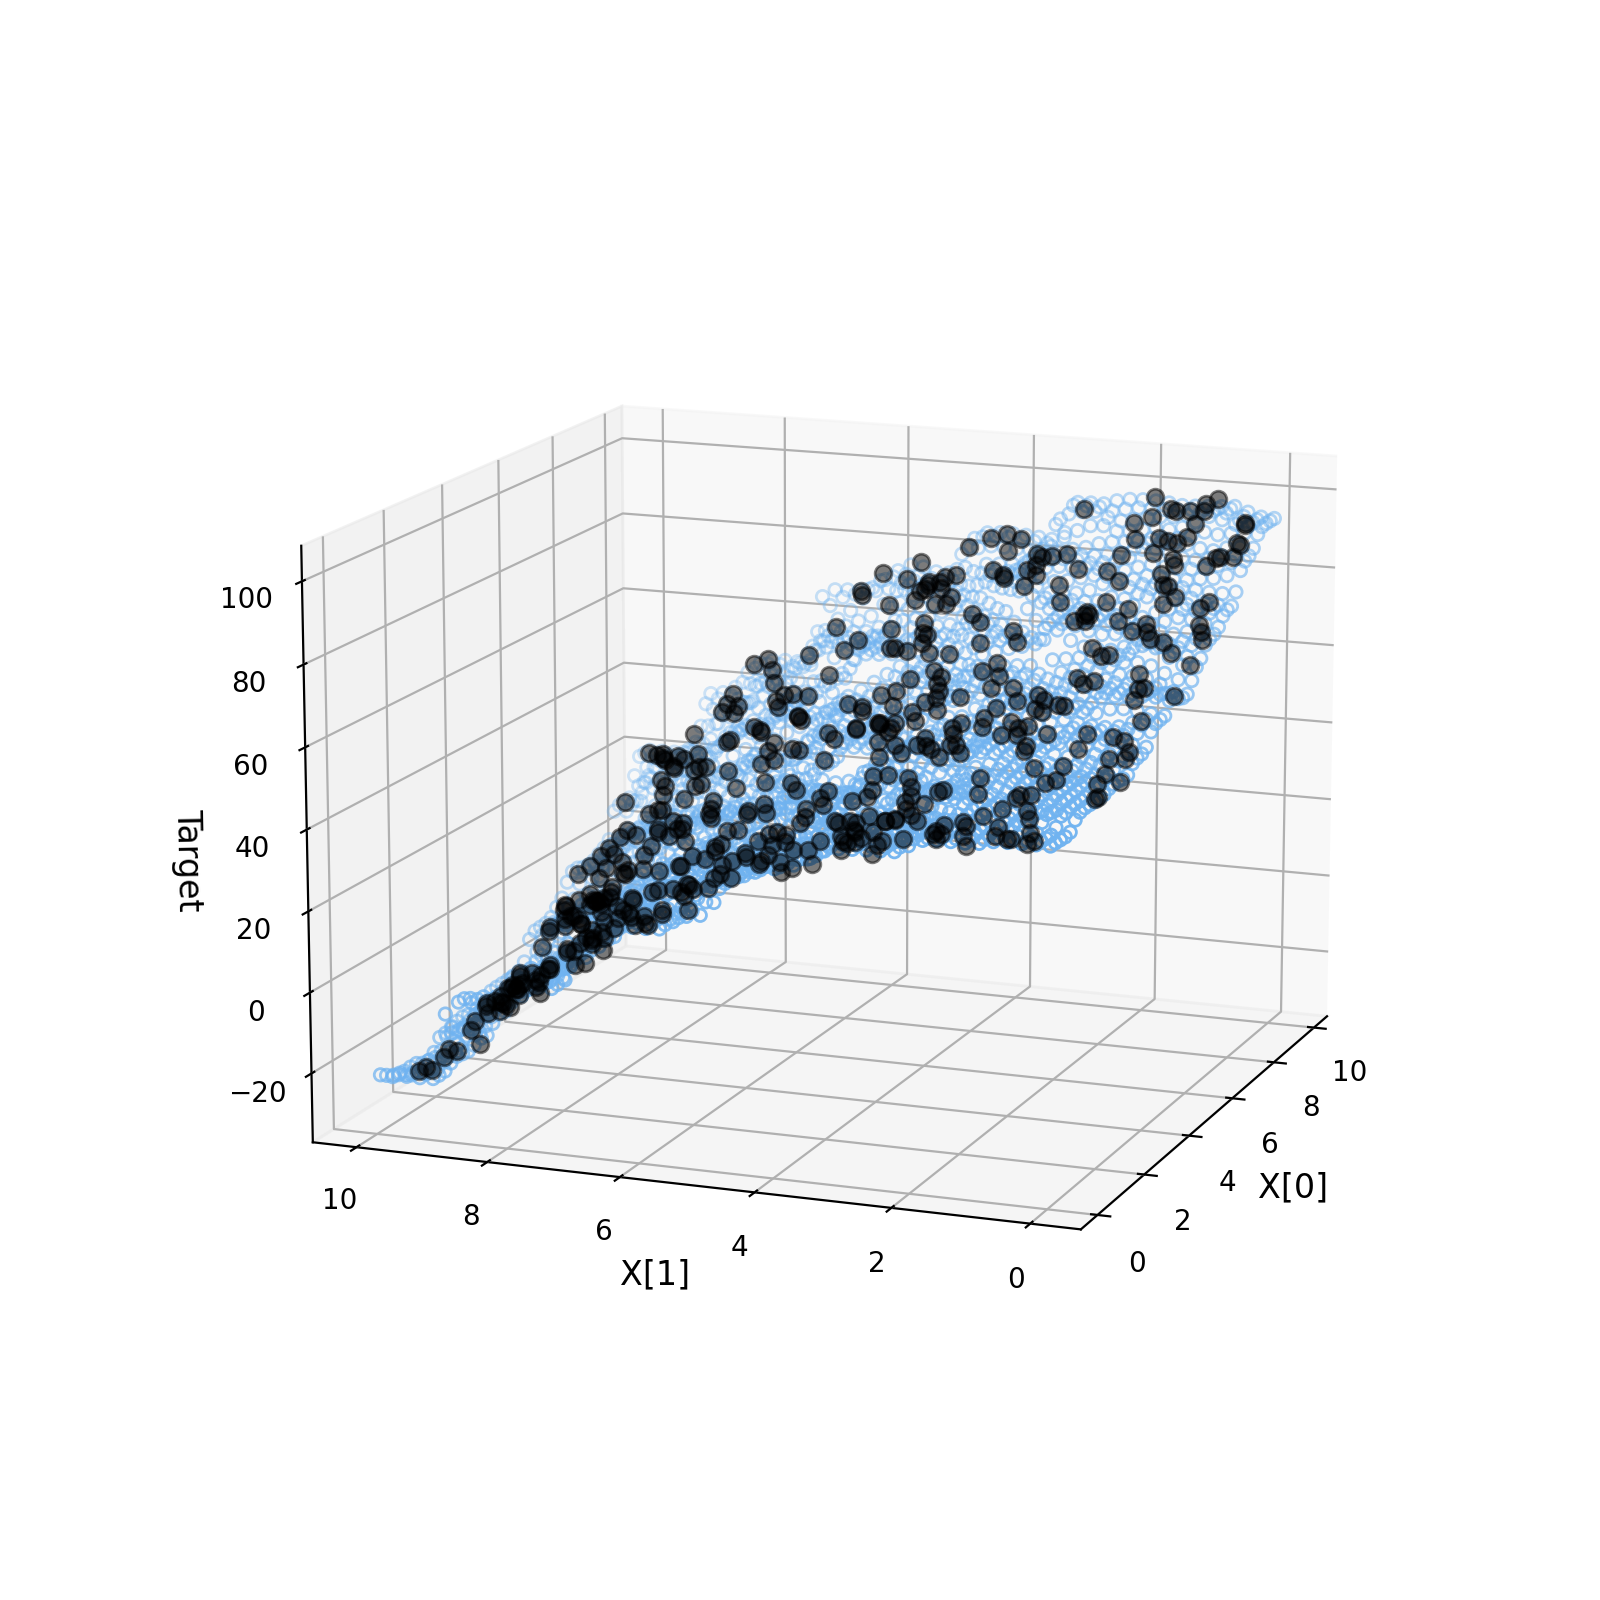

In [44]:
#Plotting Nadaraya-Watson fit
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_predNW, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [45]:
%matplotlib inline

The predicted fits for previous models appeared as flat planes in this 3D representation, whereas the best fit for Nadaraya-Watson regression allows for some curvature in the plane, ultimately better describing the data.

### Part 6

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [50]:
#GPR without uncertainties
GP = GaussianProcessRegressor()
GP.fit(X, y)
y_predGP = GP.predict(Xgrid)

#GPR with uncertainties
GPerr = GaussianProcessRegressor(alpha=(yerr/y)**2)
GPerr.fit(X, y)
y_predGPe = GPerr.predict(Xgrid)

<IPython.core.display.Javascript object>


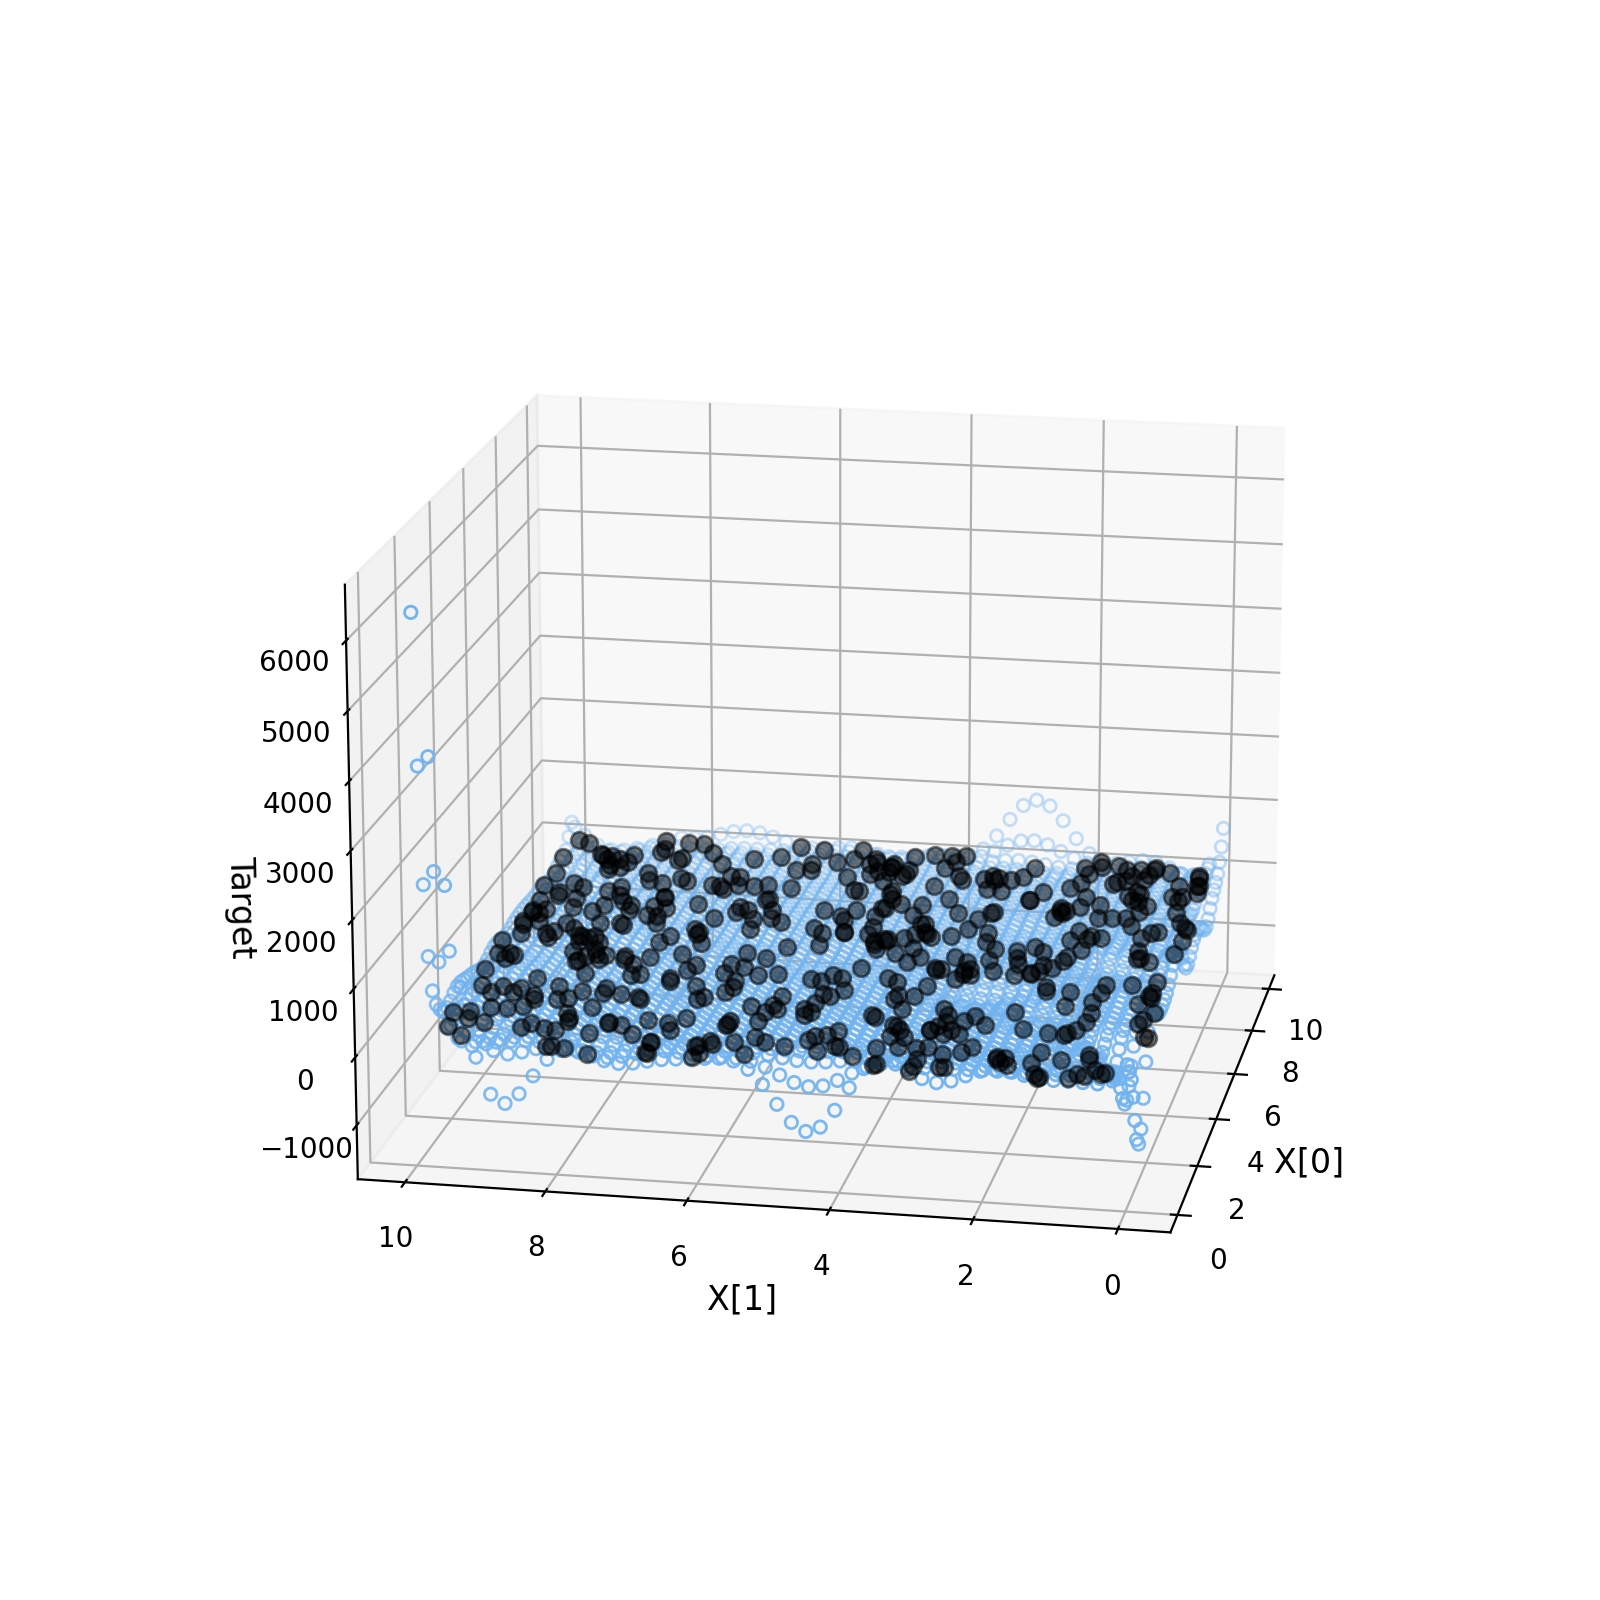

In [51]:
#Plotting GPR fit without uncertainties
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_predGP, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [52]:
%matplotlib inline

<IPython.core.display.Javascript object>


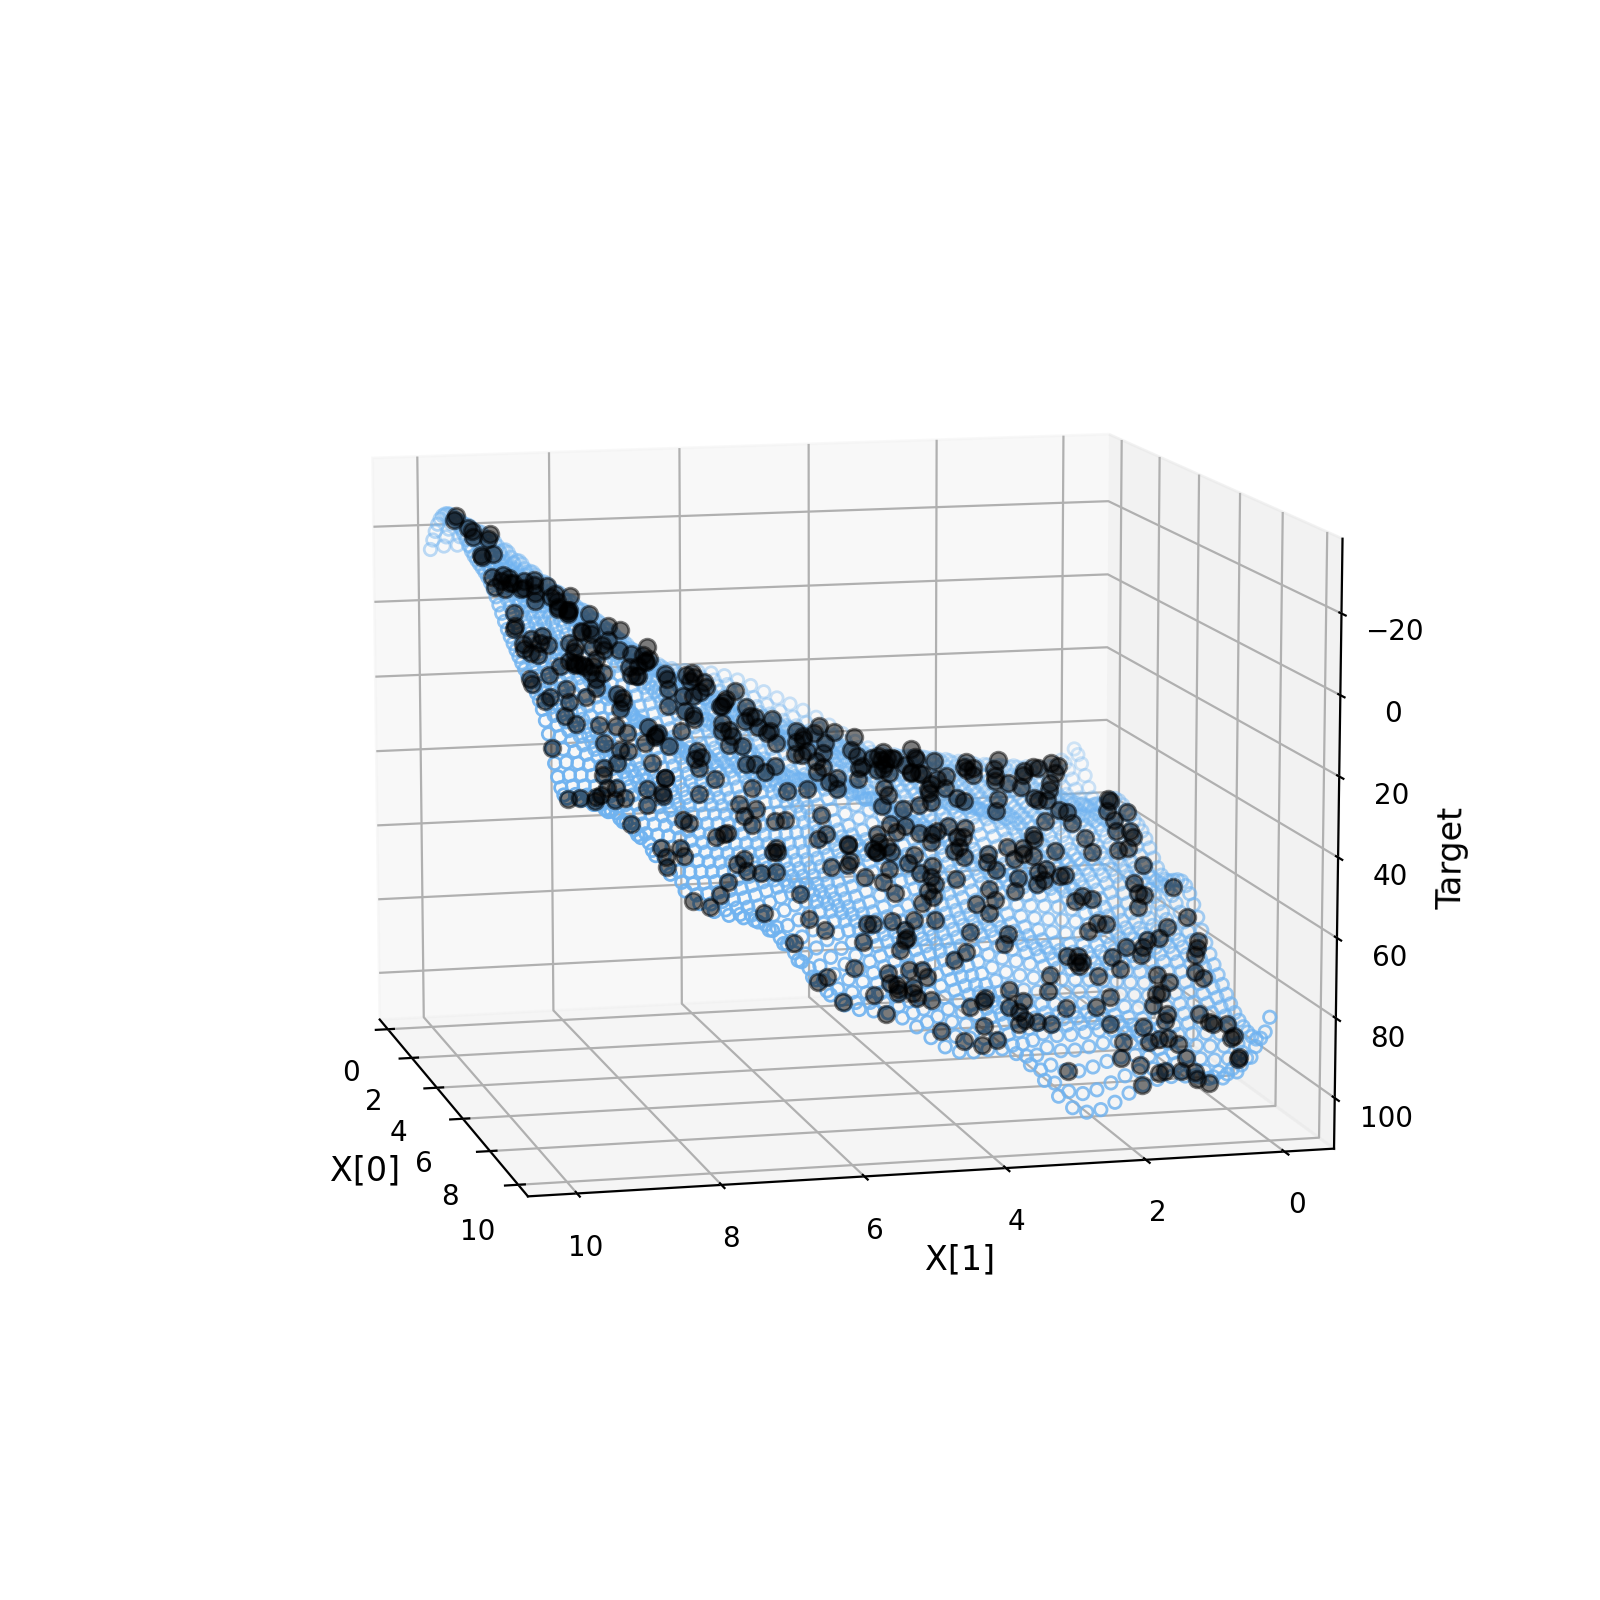

In [53]:
#Plotting GPR fit with uncertainties
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_predGPe, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [54]:
%matplotlib inline

Accounting for uncertainties results in a much better fit.

### Part 7

In [55]:
from astroML.linear_model import PolynomialRegression

In [58]:
#Fitting 4th degree polynomial to data
PR = PolynomialRegression(4)
PR.fit(X, y, yerr)
print('Best-fit regression coefficients:', PR.coef_)

y_predPR = PR.predict(Xgrid)

Best-fit regression coefficients: [ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842379e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


<IPython.core.display.Javascript object>


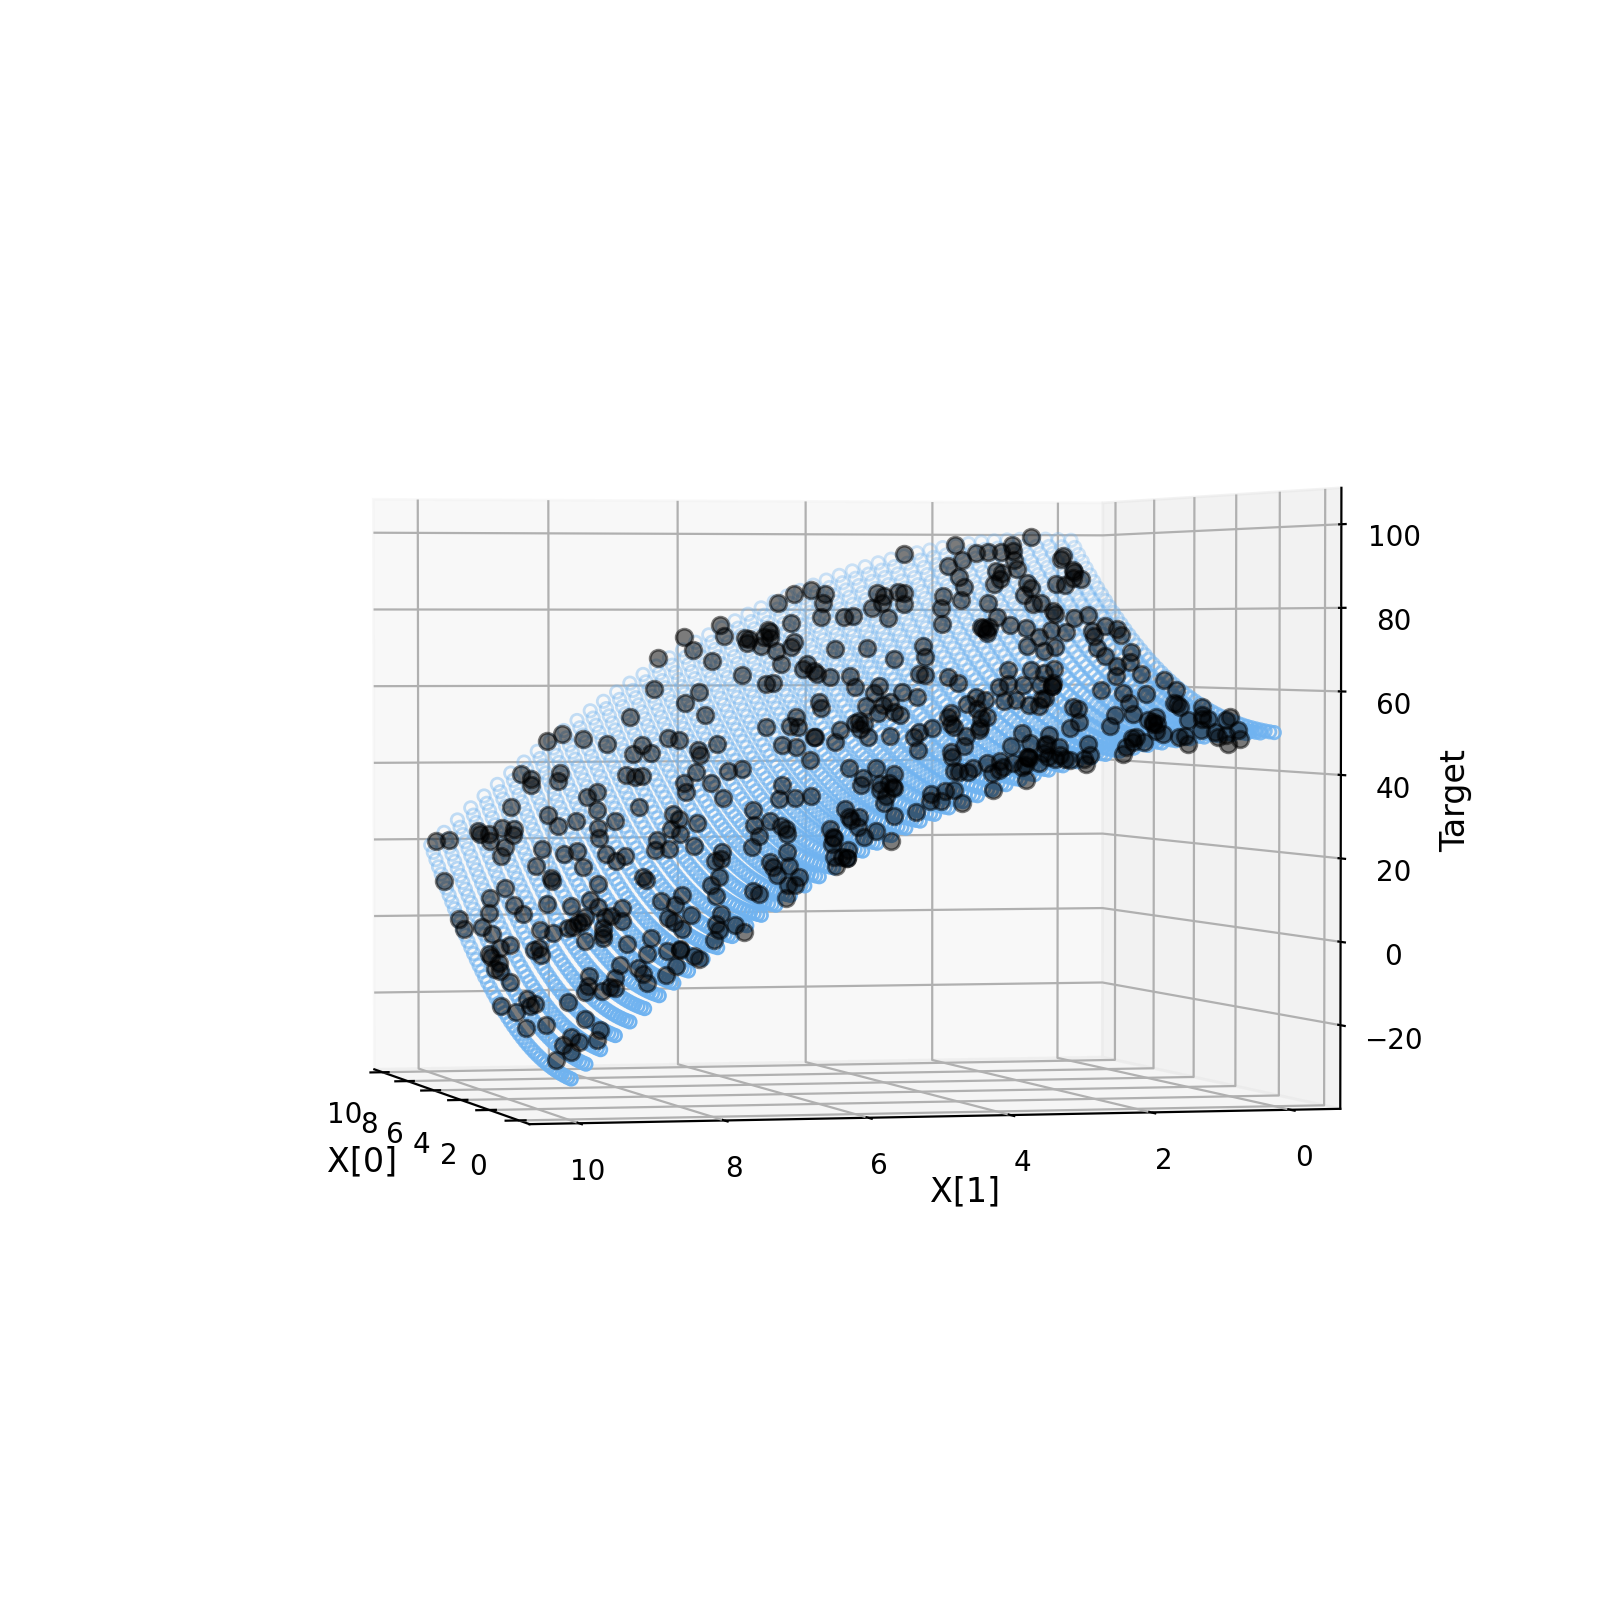

In [59]:
#Plotting PR fit
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_predPR, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [60]:
%matplotlib inline

This model seems to fit the data the best so far; it doesn't underfit like the linear models or overfit like the GPR models.

### Part 8

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#splitting data into training & testing
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2)

#splitting training data (80%) into training & CV
#so overall have 60% training, 20% CV, 20% testing
X_Train, X_cv, y_Train, y_cv, yerr_Train, yerr_cv = train_test_split(X_train, y_train, yerr_train, test_size=0.2)

RMS error:

$$\epsilon_{\rm cv/tr} = \sqrt{\frac{1}{n}\sum_{i=1}^{N_{\rm cv/tr}}
  {\left[y_i - \sum_{m=0}^d \theta_0^{(n)}x_i^m\right]}^2}$$

In [94]:
poly_deg = np.arange(1,11,1)
train_err = np.zeros(poly_deg.shape)
cv_err = np.zeros(poly_deg.shape)
BIC_train = np.zeros(poly_deg.shape)
BIC_cv = np.zeros(poly_deg.shape)

for i in range(len(poly_deg)):
    model = PolynomialRegression(poly_deg[i])
    model.fit(X_Train, y_Train, yerr_Train)
    
    #computing rms errors for training and CV sets
    train_err[i] = np.sqrt(np.sum((model.predict(X_Train) - y_Train) ** 2) / len(y_Train))
    cv_err[i] = np.sqrt(np.sum((model.predict(X_cv) - y_cv) ** 2) / len(y_cv))

    #computing BIC values for both sets
    BIC_train[i] = np.sum(((model.predict(X_Train) - y_Train)**2) * (1/yerr_Train**2)) + poly_deg[i]*np.log(len(y_Train))
    BIC_cv[i] = np.sum(((model.predict(X_cv) - y_cv)**2) * (1/yerr_cv**2)) + poly_deg[i]*np.log(len(y_cv))

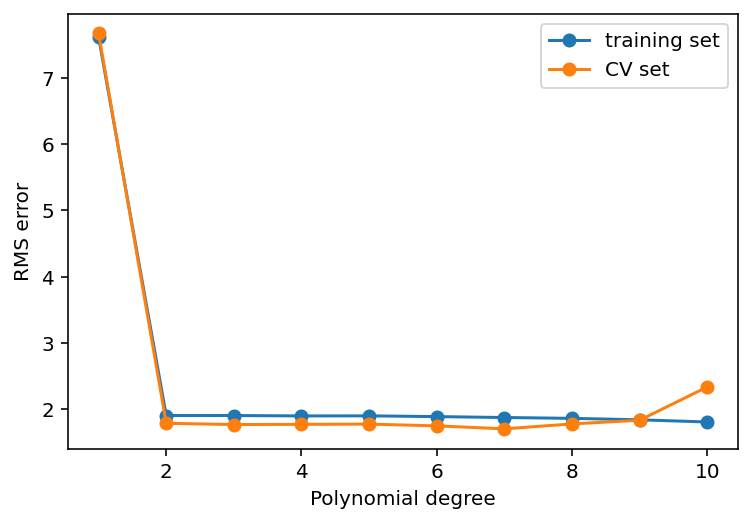

In [92]:
plt.plot(poly_deg, train_err, marker='o', label='training set')
plt.plot(poly_deg, cv_err, marker='o', label='CV set')
plt.xlabel('Polynomial degree')
plt.ylabel('RMS error')
plt.legend()
plt.show()

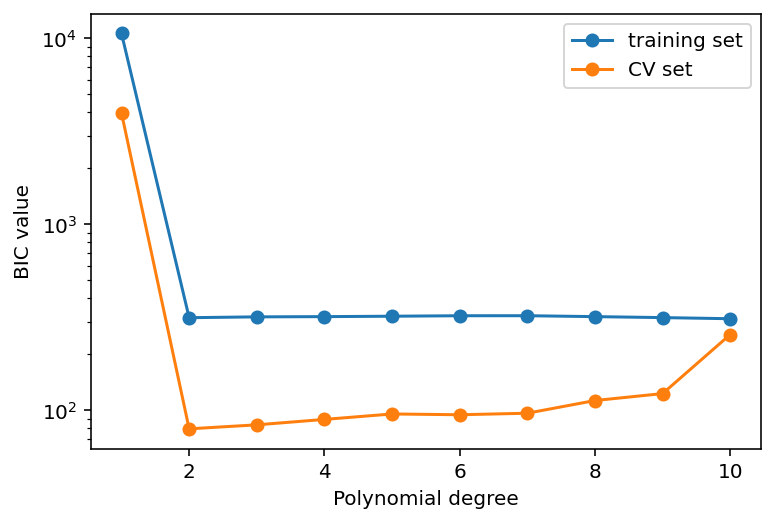

In [96]:
plt.plot(poly_deg, BIC_train, marker='o', label='training set')
plt.plot(poly_deg, BIC_cv, marker='o', label='CV set')
plt.xlabel('Polynomial degree')
plt.ylabel('BIC value')
plt.yscale('log')
plt.legend()
plt.show()

In [97]:
#Looks like the optimal polynomial degree is 2
opt_model = PolynomialRegression(2)
opt_model.fit(X_Train, y_Train, yerr_Train)

#Predicting labels of test set
y_pred_optPR = opt_model.predict(X_test)
print('Testing RMS error:', np.sqrt(np.sum((y_pred_optPR - y_test) ** 2) / len(y_test)))

Testing RMS error: 2.0712793917875194
